### We study the Mean Squared Displacement (MSD) in order to characterise the mobility of the participants. We study two different cases:  the heterogeneous case (origint at t=0) and the homogenous case (averaging over all origins). Furthermore, we also perform the study using the original processed data and the interpolated data in order to compare. Note that without interpolation the data is not uniformly separated by 1 second. Then the MSD is studied every consecutive N points. Then, with linear interpolation, the MSD is studied every second of the movement.

### We store the results in text files and then we plot the MSD as a function of time T (or N). We fit the data with a power-law and we find an almost ballistic behaviour (exponent close to 2). 

### In all cases the MSD is computed up to T=600s (or N=600 points). 

$\Large MSD(T)=\langle |\vec{r}(t+T)-\vec{r}(t)|^2 \rangle $

# INDEX

    1. MSD(N). Original Data. Heterogeneous case (origin at N=0)
        1.1- Plot and fit exponent gamma
        
    2. MSD(N). Original Data. Homogeneneous case (averaging origins)
        2.1- Plot and fit exponent gamma
        
    3. MSD(T). Interpolated Data. Heterogeneous case (origin at T=0)
        3.1- Plot and fit exponent gamma
        
    4. MSD(T). Interpolated Data. Heterogeneous case (averaging origins)
        4.1- Plot and fit exponent gamma
        
    5. Comparing original and interpolated data. Heterogeneous case
    
    6. Comparing original and interpolated data. Homogeneous case

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians

# Color blind library
plt.style.use('tableau-colorblind10')          
plt.style.library['tableau-colorblind10']


# Haversine formula for distance between GPS locations
def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    """ Function that returns the distance in metres between 2 GPS locations in degrees (latitude and longitude).
    It is based in the Haversine formula (https://en.wikipedia.org/wiki/Haversine_formula) which takes into account the
    Earth's curvature. 
    
    Input:
        - 2 GPS coordinates: (latitude1,longitude1) of the first point and (latitude2,longitude2) of the second point. 
        
    Output:
        - Distance in metres between the two GPS locations.
    """
    
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    
    return e


# Power-law fitting function
def powerlaw(x,a,gamma):  
    " It returns a power-law of the form f(x)=a·x^gamma"
    return a*x**gamma

# 1. MSD(N) Original Data. Heterogeneous case (origin at N=0)

In this case the geolocations are not separated uniformly by 1 second (though almost). So we calculate the Mean Squared Displacement using N (consecutive points or locations) instead of time T. 

This is the heterogeneous case, where we calculated the distance between every point with respect to the initial point N=0 (t=0).


In [ ]:
# Loop over all .csv files and compute the MSD for the first s=600 points (or seconds)

all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)


diff_mean_n_square=[]   # MSD
interv_conf_95_plus=[]  # Interval confindece of 95% for the MSD
interv_conf_95_minus=[]

for s in range(600):   #loop for each T (T=1,2,3,...,600)
    
    diff_list2 = [] 
    
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file
  
        latitude = df['latitude'].tolist()   #latitude and longitude to lists
        longitude = df['longitude'].tolist()
        
        if len(latitude) > s:  #use only those files of lenght > s to compute the MSD (because every user has different lenght)
            
            x=latitude[0]
            y=longitude[0]
            z=latitude[s]
            t=longitude[s]                          #|r(s)-r(0)|^2
            diff=getDistanceFromLatLonInM(x,y,z,t)  #computes the distances between the origin (t=0) and the position at "s"
            diff_list2.append(abs(diff)**2)    #append in a list all the distances (squared) # |r(s)-r(0)|^2 for each user
                                 
    
    average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(s)-r(0)|^2> average over users for a given s
    diff_mean_n_square.append(average_diff2)  #we store the averaged result of the MSD over users for every s
    
    mean = average_diff2   #mean, variance and standard deviation for the interval confidence of the MSD
    variance = sum([((xx - mean) ** 2) for xx in diff_list2]) / len(diff_list2)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_list2))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_list2))**0.5)))


# SAVE THE RESULTS IN .TXT FILES 

#np.savetxt('difussion_origin_0.txt', np.array(diff_mean_n_square))    
#np.savetxt('CI_95_origin_0_plus.txt',np.array(interv_conf_95_plus))
#np.savetxt('CI_95_origin_0_minus.txt',np.array(interv_conf_95_minus))



## 1.1- Plot and fit exponent gamma

$ MSD(T)= a · T^{\gamma}$

<ipython-input-2-8a2f5363f20f>:48: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-2-8a2f5363f20f>:49: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


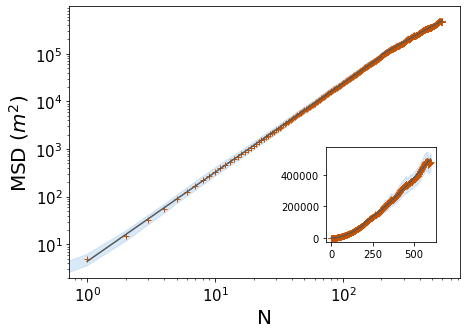

FIT PARAMETERS of F(X)=A·X^GAMMA

T < 200s:
A= 4.395986876642248 +- 0.07198712988554186
gamma= 1.8688043375088845 +- 0.0032177837395105944

200s < T < 600s:
A= 34.522076263669994 +- 1.363871722735226
gamma= 1.4976210313786362 +- 0.0064100575366470396


In [2]:
# Open and read the file with the results of the MSD(N) obtained above (heterogeneous without interpolation)
f=open('difussion_origin_0.txt',"r")   
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

# Open and read the file with the results of the confidence interval obtained above (heterogeneous without interpolation)
f2=open('CI_95_origin_0_plus.txt',"r")   
lines2=f2.readlines()
ci_plus_origin0=[]
for x2 in lines2:
    ci_plus_origin0.append(float(x2.split('\n')[0]))
f2.close()

# Open and read the file with the results of the confidence interval obtained above (heterogeneous without interpolation)
f3=open('CI_95_origin_0_minus.txt',"r")   
lines3=f3.readlines()
ci_minus_origin0=[]
for x3 in lines3:
    ci_minus_origin0.append(float(x3.split('\n')[0]))
f3.close()


# List of N=600 points for plotting
list_s=[]
for i in range(600):
    list_s.append(i)
    

# Mean Squared Displacement (float format)
msd_heterogeneous=[]
for j in data:
    msd_heterogeneous.append(float(j))
    


    
# Plot the MSD(N) for the heterogeneous case (without interpolation data)

fig, ax1 = plt.subplots(figsize=(7,5))   
ax1.plot(list_s, msd_heterogeneous, '+', c='#C85200') 
ax1.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('N',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd_heterogeneous,'+',c='#C85200')
axins2.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)


# Fit the powe-law function with the least squares method

popt, pcov = curve_fit(powerlaw, list_s[1:200], msd_heterogeneous[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = powerlaw(times, *popt)
perr = np.sqrt(np.diag(pcov))  # Fit error

popt2, pcov2 = curve_fit(powerlaw, list_s[200:], msd_heterogeneous[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = powerlaw(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  # Fit error

# Plot the fit
ax1.plot(times, model, '-',c='#595959') 
ax1.plot(times2, model2, '-', c='#595959') 
axins2.plot(times, model, '-', c='#595959')
axins2.plot(times2, model2, '-', c='#595959')

# Save the figure in pdf format
#fig.savefig('msd_heterogeneous.pdf',format='pdf', bbox_inches='tight')

plt.show()


print('FIT PARAMETERS of F(X)=A·X^GAMMA')
print('')

print('T < 200s:')
print('A=',popt[0],'+-',perr[0])
print('gamma=',popt[1],'+-', perr[1])
print('')

print('200s < T < 600s:')
print('A=',popt2[0],'+-',perr2[0])
print('gamma=',popt2[1],'+-', perr2[1])

# 2. MSD(N) Original Data. Homogeneous case (averaging origins)

In this case the geolocations are not separated uniformly by 1 second. So we calculate the Mean Squared Displacement using N (consecutive points or locations) instead of time T. 

This is the homogeneous case, where we calculated the distance between every point with respect to the initial point N=0, and then we change the initial point to the next one and so one. Finally we average aver all origins (thermalising).


In [ ]:
# Loop over all .csv files and compute the MSD for the first s=600 points (or seconds)

all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_s=[]
diff_mean_s_square=[]         # MSD and interval confidence of 95%
interv_conf_95_plus=[]
interv_conf_95_minus=[]


for s in range(1,600):   #loop for each T (T=1,2,3,...,600)
    
    diff_mean_n=[]
    diff_mean_n_square=[]
    
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file
        
        latitude = df['latitude'].tolist()   #latitude and longitude to lists
        longitude = df['longitude'].tolist()

        if len(latitude) > s:   #use only those files of lenght > 200 to compute the MSD (almost all of them)
            
            diff_list2 = [] 
            
            #computes ALL the distances between locations separated "s" timesteps for a given participant
            for x, y, z, t in zip(latitude[0::], longitude[0::], latitude[s::], longitude[s::]): #|r(t+s)-r(t)|^2
                diff=getDistanceFromLatLonInM(x,y,z,y)  
                diff_list2.append(diff**2)      #append in a list all the distances (squared) # |r(t+s)-r(t)|^2

                #for instance, for s=1:  r1-r0, r2-r1, r3-r2, r4-r1 (all 1 step distances)
                #for s=2: r2-r0, r3-r1, r4-r2,...etc (all 2 step distances)
      
            average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(t+s)-r(t)|^2> average over t (for a given s and a given indiv.)
            diff_mean_n_square.append(average_diff2) #we store the averaged result for each individual in a list (for a given s)
    
    diff_mean_n_square2=sum(diff_mean_n_square)/len(diff_mean_n_square) #Average over users, for a given s.
    diff_mean_s_square.append(diff_mean_n_square2)  #Then for each s, we store the averaged value of users. MSD(s)7
    
    mean = diff_mean_n_square2    #mean, variance and st8andard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in diff_mean_n_square]) / len(diff_mean_n_square)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_mean_n_square))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_mean_n_square))**0.5)))

    
# Save the results in text files

#np.savetxt('difussion.txt', np.array(diff_mean_s_square))
#np.savetxt('ci_95_msd_homogenous_plus.txt', np.array(interv_conf_95_plus))
#np.savetxt('ci_95_msd_homogenous_minus.txt', np.array(interv_conf_95_minus))


## 2.1- Plot and fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-3-6da4e6131d5b>:48: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-3-6da4e6131d5b>:49: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


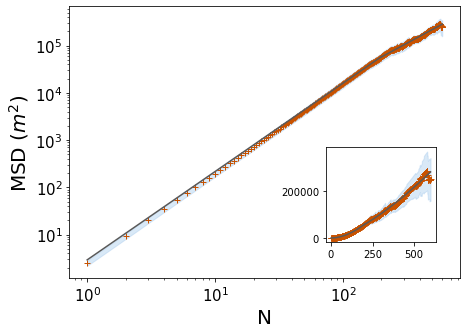

FIT PARAMETERS of F(X)=A·X^GAMMA

T < 200s:
A= 2.916974605957915 +- 0.08181566061905014
gamma= 1.8691985343998898 +- 0.005505843196280484

200s < T < 600s:
A= 25.396230477329595 +- 1.7611081856742623
gamma= 1.4577573790744773 +- 0.011257598001667863


In [3]:
# Open and read the file with the results of the MSD(N) obtained above (homogeneous without interpolation)
f=open('difussion.txt',"r")   
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

# Open and read the file with the results of the confidence interval obtained above (homogeneous without interpolation)
f2=open('ci_95_msd_homogenous_plus.txt',"r")   
lines2=f2.readlines()
ci_plus_homogenous=[]
for x2 in lines2:
    ci_plus_homogenous.append(float(x2.split('\n')[0]))
f2.close()

# Open and read the file with the results of the confidence interval obtained above (homogeneous without interpolation)
f3=open('ci_95_msd_homogenous_minus.txt',"r")   
lines3=f3.readlines()
ci_minus_homogenous=[]
for x3 in lines3:
    ci_minus_homogenous.append(float(x3.split('\n')[0]))
f3.close()

# List of points N=1,...,600 for plotting
list_s=[]
for i in range(1,600):
    list_s.append(i)

    
# MSD in float format
data2=[]
for j in data:
    data2.append(float(j))
    
msd_homogeneous=np.array(data2)    # msd(s) as an array
ss=np.array(list_s)


# Plot the MSD(N) for the heterogeneous case (without interpolation data)

fig, ax1 = plt.subplots(figsize=(7,5))   
ax1.plot(ss, msd_homogeneous, '+', c='#C85200') 
ax1.fill_between(ss, ci_minus_homogenous, ci_plus_homogenous, color='#A2C8EC', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('N',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(ss, msd_homogeneous,'+',c='#C85200')
axins2.fill_between(ss, ci_minus_homogenous, ci_plus_homogenous, color='#A2C8EC', alpha=.4)


# Fit the powe-law function with the least squares method

popt, pcov = curve_fit(powerlaw, ss[:200], msd_homogeneous[:200], p0=(1,1))
times = np.arange(ss[0], ss[200], 0.01)
model = powerlaw(times, *popt)
perr = np.sqrt(np.diag(pcov))  # Fit error

popt2, pcov2 = curve_fit(powerlaw, ss[200:], msd_homogeneous[200:], p0=(1,1))
times2 = np.arange(ss[200], ss[-1], 0.01)
model2 = powerlaw(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  # Fit error

# Plot the fit
ax1.plot(times, model, '-',c='#595959') 
ax1.plot(times2, model2, '-', c='#595959') 
axins2.plot(times, model, '-', c='#595959')
axins2.plot(times2, model2, '-', c='#595959')

# Save the figure in pdf format
#fig.savefig('msd_homogeneous.pdf',format='pdf', bbox_inches='tight')

plt.show()


print('FIT PARAMETERS of F(X)=A·X^GAMMA')
print('')

print('T < 200s:')
print('A=',popt[0],'+-',perr[0])
print('gamma=',popt[1],'+-', perr[1])
print('')

print('200s < T < 600s:')
print('A=',popt2[0],'+-',perr2[0])
print('gamma=',popt2[1],'+-', perr2[1])



# 3. MSD(T) Interpolated Data. Heterogeneous case (origin at T=0)

In this case the geolocations are separated uniformly by 1 second. So we calculate the Mean Squared Displacement using the time T.

This is the heterogeneous case, where we calculated the distance between every point with respect to the initial point T=0.


In [ ]:
# Loop over all .csv files and compute the MSD for the first s=600 points (or seconds)

all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_n_square=[]
interv_conf_95_plus=[]    # MSD and Confidence Intervals of 95%
interv_conf_95_minus=[]

for s in range(600):   #loop for each T (T=1,2,3,...,600)
    
    diff_list2 = [] 
    
    for file in all_files:   #loop for each user file (csv)
        
        df = pd.read_csv(file) #read the file
        
        ##########################################################################################################
        # LINEAR INTERPOLATION
        
        # The linear interpolation is performed in time with this code. 
        # Another option could be using the .csv files which are already interpolated
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
        df2.index = df2['time']  # Then convert the column time into index
        
        del df2['time']  # delete column time
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        # Resample index of times every 1 second and interpolate missing values of the latitude and longitude
        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)
        ##########################################################################################################
        
        
        
        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()
        
        if len(latitude) > s:  #use only those files of lenght > s to compute the MSD (because every user has different lenght)
            
            
            x=latitude[0]
            y=longitude[0]
            z=latitude[s]
            t=longitude[s]                          #|r(s)-r(0)|^2
            diff=getDistanceFromLatLonInM(x,y,z,t)  #computes the distances between the origin (t=0) and the position at "s"
            diff_list2.append(abs(diff)**2)    #append in a list all the distances (squared) # |r(s)-r(0)|^2 for each user
                                 
    
    average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(s)-r(0)|^2> average over users for a given s
    diff_mean_n_square.append(average_diff2)  #we store the averaged result over users for a every s
    
    
    #mean, variance and standard deviation for the interval confidence
    mean = average_diff2   
    variance = sum([((xx - mean) ** 2) for xx in diff_list2]) / len(diff_list2)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_list2))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_list2))**0.5)))


# Save text files

#np.savetxt('difussion_origin_0_interpolation.txt', np.array(diff_mean_n_square))
#np.savetxt('CI_95_origin_0_plus_interpolation.txt',np.array(interv_conf_95_plus))
#np.savetxt('CI_95_origin_0_minus_interpolation.txt',np.array(interv_conf_95_minus))


## 3.1- Plot and fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-4-76cdb069cf85>:44: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-4-76cdb069cf85>:45: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


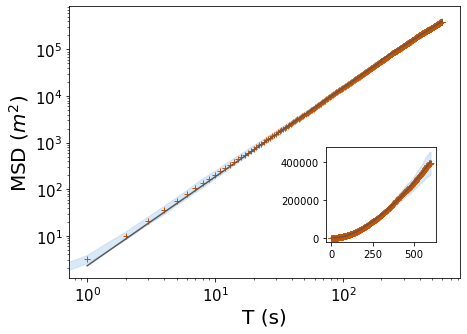

FIT PARAMETERS of F(X)=A·X^GAMMA

T < 200s:
A= 2.280003972310439 +- 0.015040231735358163
gamma= 1.9072550895131604 +- 0.001295393565118429

200s < T < 600s:
A= 5.7986700598300125 +- 0.10975729185958549
gamma= 1.7434621225915354 +- 0.0030605667774263267


In [4]:
f=open('difussion_origin_0_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()


f2=open('CI_95_origin_0_plus_interpolation.txt',"r")   #Open and read the file with the results of the CI obtained above.
lines2=f2.readlines()
ci_plus_origin0_interpolation=[]
for x2 in lines2:
    ci_plus_origin0_interpolation.append(float(x2.split('\n')[0]))
f2.close()


f3=open('CI_95_origin_0_minus_interpolation.txt',"r")   #Open and read the file with the results of the CI obtained above.
lines3=f3.readlines()
ci_minus_origin0_interpolation=[]
for x3 in lines3:
    ci_minus_origin0_interpolation.append(float(x3.split('\n')[0]))
f3.close()


# list of times T=1,...,600
ss=[]
for i in range(600):
    ss.append(i)

# MSD in float format
msd_heterogenous_interpolation=[]
for j in data:
    msd_heterogenous_interpolation.append(float(j))
    
    
# Plot the MSD(N) for the heterogeneous case (without interpolation data)

fig, ax1 = plt.subplots(figsize=(7,5))   
ax1.plot(ss, msd_heterogenous_interpolation, '+', c='#C85200') 
ax1.fill_between(ss, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='#A2C8EC', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('T (s)',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(ss, msd_heterogenous_interpolation,'+',c='#C85200')
axins2.fill_between(ss, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='#A2C8EC', alpha=.4)


# Fit the powe-law function with the least squares method

popt, pcov = curve_fit(powerlaw, ss[1:200], msd_heterogenous_interpolation[1:200], p0=(1,1))
times = np.arange(ss[1], ss[200], 0.01)
model = powerlaw(times, *popt)
perr = np.sqrt(np.diag(pcov))  # Fit error

popt2, pcov2 = curve_fit(powerlaw, ss[200:], msd_heterogenous_interpolation[200:], p0=(1,1))
times2 = np.arange(ss[200], ss[-1], 0.01)
model2 = powerlaw(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  # Fit error

# Plot the fit
ax1.plot(times, model, '-',c='#595959') 
ax1.plot(times2, model2, '-', c='#595959') 
axins2.plot(times, model, '-', c='#595959')
axins2.plot(times2, model2, '-', c='#595959')

# Save the figure in pdf format
#fig.savefig('msd_heterogeneous_interpolated.pdf',format='pdf', bbox_inches='tight')

plt.show()


print('FIT PARAMETERS of F(X)=A·X^GAMMA')
print('')

print('T < 200s:')
print('A=',popt[0],'+-',perr[0])
print('gamma=',popt[1],'+-', perr[1])
print('')

print('200s < T < 600s:')
print('A=',popt2[0],'+-',perr2[0])
print('gamma=',popt2[1],'+-', perr2[1])

# 4. MSD(T) Interpolated Data. Homogeneous case (averaging origins)

In this case the geolocations are separated uniformly by 1 second. So we calculate the Mean Squared Displacement using the time T.

This is the homogeneous case, where we calculated the distance between every point with respect to the initial point T=0, and then we change the initial point to the next one and so one. Finally we average aver all origins (thermalising).


In [ ]:
# Loop over all .csv files and compute the MSD for the first s=600 points (or seconds)

all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_s=[]
diff_mean_s_square=[]    # MSD and confidence intervals of 95%
interv_conf_95_plus=[]
interv_conf_95_minus=[]

for s in range(1,600):   #loop for each T (T=1,2,3,...,200)
    
    diff_mean_n=[]
    diff_mean_n_square=[]

    for file in all_files:   #loop for each user file (csv). 
        
        df = pd.read_csv(file) #read the file     
        
        ##########################################################################################################
        # LINEAR INTERPOLATION
        
        # The linear interpolation is performed in time with this code. 
        # Another option could be using the .csv files which are already interpolated
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
        df2.index = df2['time']  # Then convert the column time into index
        
        del df2['time']  # delete column time
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        # Resample index of times every 1 second and interpolate missing values of the latitude and longitude
        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)
        ##########################################################################################################

        
        
        latitude=df2['latitude'].tolist()
        longitude=df2['longitude'].tolist()
        

        if len(latitude) > s:   #use only those files of lenght > 200 to compute the MSD (almost all of them)
            
            diff_list2 = [] 
            
            for x, y, z, t in zip(latitude[0::], longitude[0::], latitude[s::], longitude[s::]): #|r(t+s)-r(t)|^2
                diff=getDistanceFromLatLonInM(x,y,z,y)  #computes ALL the distances between locations separated "s" timesteps
                diff_list2.append(diff**2)    #append in a list all the distances (squared) # |r(t+s)-r(t)|^2
                                              #for instance, for s=1:  r1-r0, r2-r1, r3-r2, r4-r1 (all 1 step distances)
                                              #for s=2: r2-r0, r3-r1, r4-r2,...etc (for a given individual)
      
            average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(t+s)-r(t)|^2> average over t (for a given s and a given indiv.)
            diff_mean_n_square.append(average_diff2)  #we store the averaged result for each individual in a list (for a given s)
    
    diff_mean_n_square2=sum(diff_mean_n_square)/len(diff_mean_n_square) #Average over users, for a given s.
    diff_mean_s_square.append(diff_mean_n_square2)  #Then for each s, we store the averaged value of users. MSD(s)
    
    #mean, variance and st8andard deviation for the interval confidence
    mean = diff_mean_n_square2    
    variance = sum([((xx - mean) ** 2) for xx in diff_mean_n_square]) / len(diff_mean_n_square)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_mean_n_square))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_mean_n_square))**0.5)))


# Save text files with the results

#np.savetxt('difussion_interpolation.txt', np.array(diff_mean_s_square))
#np.savetxt('ci_95_msd_homogenous_plus_interpolation.txt', np.array(interv_conf_95_plus))
#np.savetxt('ci_95_msd_homogenous_minus_interpolation.txt', np.array(interv_conf_95_minus))


## 4.1. Fit exponent gamma

$ MSD(T)= A T^{\gamma}$

<ipython-input-5-02ba785711e3>:43: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-5-02ba785711e3>:44: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


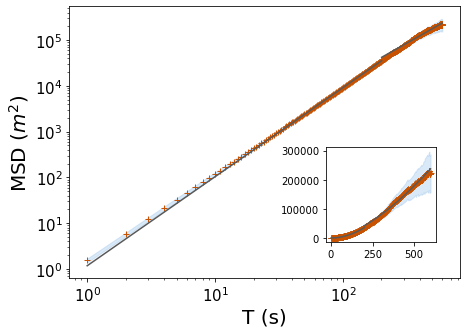

FIT PARAMETERS of F(X)=A·X^GAMMA

T < 200s:
A= 1.1716104300810715 +- 0.006669508105612321
gamma= 1.9470067321323263 +- 0.0011160713729166016

200s < T < 600s:
A= 9.894071508279989 +- 0.521773031684679
gamma= 1.5767871282091228 +- 0.008546092451748189


In [5]:
f=open('difussion_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

f2=open('ci_95_msd_homogenous_plus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
ci_msd_homogenous_plus_interpolation=[]
for x2 in lines2:
    ci_msd_homogenous_plus_interpolation.append(float(x2.split('\n')[0]))
f2.close()

f3=open('ci_95_msd_homogenous_minus_interpolation.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
ci_msd_homogenous_minus_interpolation=[]
for x3 in lines3:
    ci_msd_homogenous_minus_interpolation.append(float(x3.split('\n')[0]))
f3.close()


list_s=[]
for i in range(1,600):
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))
    
msd_homogenous_interpolation=np.array(data2)    # msd(s) as an array
ss=np.array(list_s)


# Plot the MSD(N) for the heterogeneous case (without interpolation data)

fig, ax1 = plt.subplots(figsize=(7,5))   
ax1.plot(ss, msd_homogenous_interpolation, '+', c='#C85200') 
ax1.fill_between(ss, ci_msd_homogenous_minus_interpolation, ci_msd_homogenous_plus_interpolation, color='#A2C8EC', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('T (s)',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(ss, msd_homogenous_interpolation,'+',c='#C85200')
axins2.fill_between(ss, ci_msd_homogenous_minus_interpolation, ci_msd_homogenous_plus_interpolation, color='#A2C8EC', alpha=.4)


# Fit the powe-law function with the least squares method

popt, pcov = curve_fit(powerlaw, ss[:200], msd_homogenous_interpolation[:200], p0=(1,1))
times = np.arange(ss[0], ss[200], 0.01)
model = powerlaw(times, *popt)
perr = np.sqrt(np.diag(pcov))  # Fit error

popt2, pcov2 = curve_fit(powerlaw, ss[200:], msd_homogenous_interpolation[200:], p0=(1,1))
times2 = np.arange(ss[200], ss[-1], 0.01)
model2 = powerlaw(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  # Fit error

# Plot the fit
ax1.plot(times, model, '-',c='#595959') 
ax1.plot(times2, model2, '-', c='#595959') 
axins2.plot(times, model, '-', c='#595959')
axins2.plot(times2, model2, '-', c='#595959')

# Save the figure in pdf format
#fig.savefig('msd_homogeneous_interpolated.pdf',format='pdf', bbox_inches='tight')

plt.show()


print('FIT PARAMETERS of F(X)=A·X^GAMMA')
print('')

print('T < 200s:')
print('A=',popt[0],'+-',perr[0])
print('gamma=',popt[1],'+-', perr[1])
print('')

print('200s < T < 600s:')
print('A=',popt2[0],'+-',perr2[0])
print('gamma=',popt2[1],'+-', perr2[1])


# 5- Comparing original and interpolated data. Heterogeneous case

<ipython-input-11-e4c2cd0e9a83>:15: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-11-e4c2cd0e9a83>:16: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


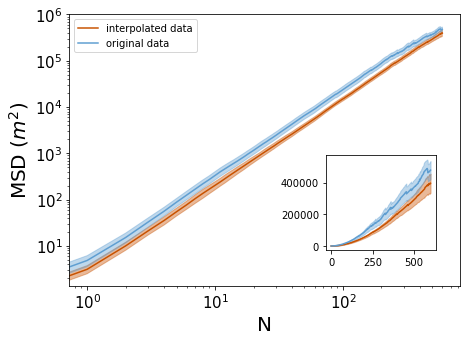

Original data

T < 200s: gamma= 1.8688043375088845 +- 0.0032177837395105944
200s < T < 600s: gamma= 1.4976210313786362 +- 0.0064100575366470396


Interpolated data

T < 200s: gamma= 1.9072550895131604 +- 0.001295393565118429
200s < T < 600s: gamma= 1.7434621225915354 +- 0.0030605667774263267


In [11]:
list_s=[]
for i in range(600):
    list_s.append(i)


fig, ax1 = plt.subplots(figsize=(7,5))   

ax1.plot(list_s, msd_heterogenous_interpolation, '-', c='#C85200',label='interpolated data')
ax1.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='#C85200', alpha=.4)
ax1.plot(list_s, msd_heterogeneous,'-',c='#5F9ED1',label='original data')
ax1.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#5F9ED1', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('N',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
ax1.legend()
                 
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd_heterogenous_interpolation,'-',c='#C85200')
axins2.plot(list_s,msd_heterogeneous,'-',c='#5F9ED1')
axins2.fill_between(list_s, ci_minus_origin0_interpolation, ci_plus_origin0_interpolation, color='#C85200', alpha=.4)
axins2.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#5F9ED1', alpha=.4)

                 
# Fit interpolated data
popt, pcov = curve_fit(powerlaw, list_s[1:200], msd_heterogenous_interpolation[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = powerlaw(times, *popt)
perr = np.sqrt(np.diag(pcov))  

popt2, pcov2 = curve_fit(powerlaw, list_s[200:], msd_heterogenous_interpolation[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = powerlaw(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))

# Fit original data
popt3, pcov3 = curve_fit(powerlaw, list_s[1:200], msd_heterogeneous[1:200], p0=(1,1))
times3 = np.arange(list_s[1], list_s[200], 0.01)
model3 = powerlaw(times3, *popt3)
perr3 = np.sqrt(np.diag(pcov3))  

popt4, pcov4 = curve_fit(powerlaw, list_s[200:], msd_heterogeneous[200:], p0=(1,1))
times4 = np.arange(list_s[200], list_s[-1], 0.01)
model4 = powerlaw(times4, *popt4)
perr4 = np.sqrt(np.diag(pcov4))  
        
# Save figure
#fig.savefig('msd_heterogeneous_comparision.pdf',format='pdf', bbox_inches='tight')

plt.show()


print('Original data')
print('')
print('T < 200s:', 'gamma=',popt3[1],'+-', perr3[1])
print('200s < T < 600s:', 'gamma=',popt4[1],'+-', perr4[1])

print('')
print('')

print('Interpolated data')
print('')
print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])


# 6- Comparing original and interpolated data. Homogeneous case

<ipython-input-16-717fbaa3814b>:15: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-16-717fbaa3814b>:16: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


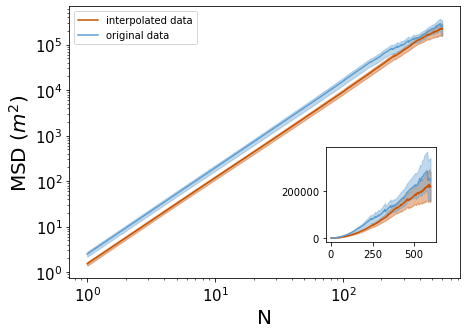

Original data

T < 200s: gamma= 1.8691985355982341 +- 0.0055197998766742026
200s < T < 600s: gamma= 1.4577573790744773 +- 0.011257598001667863


Interpolated data

T < 200s: gamma= 1.947006733545394 +- 0.0011189003292993332
200s < T < 600s: gamma= 1.5767871282091228 +- 0.008546092451748189


In [16]:
list_s=[]
for i in range(1,600):
    list_s.append(i)


fig, ax1 = plt.subplots(figsize=(7,5))   

ax1.plot(list_s, msd_homogenous_interpolation, '-', c='#C85200',label='interpolated data')
ax1.fill_between(list_s, ci_msd_homogenous_minus_interpolation, ci_msd_homogenous_plus_interpolation, color='#C85200', alpha=.4)
ax1.plot(list_s, msd_homogeneous,'-',c='#5F9ED1',label='original data')
ax1.fill_between(list_s, ci_minus_homogenous, ci_plus_homogenous, color='#5F9ED1', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('N',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
ax1.legend()
                 
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd_homogenous_interpolation,'-',c='#C85200')
axins2.plot(list_s,msd_homogeneous,'-',c='#5F9ED1')
axins2.fill_between(list_s, ci_msd_homogenous_minus_interpolation, ci_msd_homogenous_plus_interpolation, color='#C85200', alpha=.4)
axins2.fill_between(list_s, ci_minus_homogenous, ci_plus_homogenous, color='#5F9ED1', alpha=.4)

                 
# Fit interpolated data
popt, pcov = curve_fit(powerlaw, list_s[1:200], msd_homogenous_interpolation[1:200], p0=(1,1))
times = np.arange(list_s[1], list_s[200], 0.01)
model = powerlaw(times, *popt)
perr = np.sqrt(np.diag(pcov))  

popt2, pcov2 = curve_fit(powerlaw, list_s[200:], msd_homogenous_interpolation[200:], p0=(1,1))
times2 = np.arange(list_s[200], list_s[-1], 0.01)
model2 = powerlaw(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))

# Fit original data
popt3, pcov3 = curve_fit(powerlaw, list_s[1:200], msd_homogeneous[1:200], p0=(1,1))
times3 = np.arange(list_s[1], list_s[200], 0.01)
model3 = powerlaw(times3, *popt3)
perr3 = np.sqrt(np.diag(pcov3))  

popt4, pcov4 = curve_fit(powerlaw, list_s[200:], msd_homogeneous[200:], p0=(1,1))
times4 = np.arange(list_s[200], list_s[-1], 0.01)
model4 = powerlaw(times4, *popt4)
perr4 = np.sqrt(np.diag(pcov4))  
        
# Save figure
#fig.savefig('msd_homogeneous_comparision.pdf',format='pdf', bbox_inches='tight')

plt.show()


print('Original data')
print('')
print('T < 200s:', 'gamma=',popt3[1],'+-', perr3[1])
print('200s < T < 600s:', 'gamma=',popt4[1],'+-', perr4[1])

print('')
print('')

print('Interpolated data')
print('')
print('T < 200s:', 'gamma=',popt[1],'+-', perr[1])
print('200s < T < 600s:', 'gamma=',popt2[1],'+-', perr2[1])
